In [1]:
from function import *

In [2]:
import pandas as pd
import os
import arxiv

import urllib
from sklearn.metrics.pairwise import cosine_similarity
import fitz
import tensorflow_hub as hub
import numpy as np 

In [3]:
import time

In [4]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [5]:
# loc_name_Arxiv1 = "pdftest/2108.13487v1.Want_To_Reduce_Labeling_Cost_GPT_3_Can_Help.pdf"
# loc_name_Anth1 = "pdftest/Anth-Want To Reduce Labeling Cost GPT-3 Can Help.pdf"

# loc_name_Arxiv2 = "pdftest/2112.15051v1.Does_QA_based_intermediate_training_help_fine_tuning_language_models_for_text_classification.pdf"
# loc_name_Anth2 = "pdftest/Anth-Does QA-based intermediate training help fine-tuning language models for text classification.pdf"

# loc_name_Arxiv3 = "pdftest/2201.11934v1.A_Secure_and_Efficient_Federated_Learning_Framework_for_NLP.pdf"
# loc_name_Anth3 = "pdftest/Anth-A Secure and Efficient Federated Learning Framework for NLP.pdf"

loc_name_Arxiv = "pdftest/Term_Expansion_and_FinBERT_fine_tuning_for_Hypernym_and_Synonym_Ranking_of_Financial_Terms.pdf"
loc_name_Anth = "pdftest/Anth-Term Expansion and FinBERT fine-tuning for Hypernym and Synonym Ranking of Financial Terms.pdf"




doc_Arxiv = fitz.open(loc_name_Arxiv)
doc_Anth = fitz.open(loc_name_Anth)

# doc_Arxiv1 = fitz.open(loc_name_Arxiv1)
# doc_Anth1 = fitz.open(loc_name_Anth1)

# doc_Arxiv2 = fitz.open(loc_name_Arxiv2)
# doc_Anth2 = fitz.open(loc_name_Anth2)

# doc_Arxiv3 = fitz.open(loc_name_Arxiv3)
# doc_Anth3 = fitz.open(loc_name_Anth3)

In [6]:
# loc_name_Arxiv6 = "pdf sim/Arxiv.pdf"
# loc_name_Anth6 = "pdf sim/Anth.pdf"

# doc_Arxiv6 = fitz.open(loc_name_Arxiv6)
# doc_Anth6 = fitz.open(loc_name_Anth6)

In [5]:
def test_sim(embed, loc_name_Arxiv, loc_name_Anth):
#sometimes download not available. Then download works but does not give a good pdf so reading does not work
#         embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
        print('start load')
        doc_Arxiv = fitz.open(loc_name_Arxiv)
        doc_Anth = fitz.open(loc_name_Anth)
        
        print('start blocks')
        b_Anth = get_blocks(doc_Anth)
        b_Arxiv = get_blocks(doc_Arxiv)
        rect = (5,180,40,570)
        remove_bar = doc_Arxiv.load_page(0).get_text("text",clip=rect)
        try:
            b_Arxiv.remove(remove_bar)
        except:
            print('Unable to remove bar from arxiv')
    
        elem_both_list = set(b_Anth)&set(b_Arxiv)
        print('elem_both_list')
        print(elem_both_list)
        print('start join')
        #join blocks
#         p_Anth = join_diff(b_Anth, elem_both_list)
#         p_Arxiv = join_diff(b_Arxiv, elem_both_list)
        p_Anth = join_blocks(b_Anth, elem_both_list)
        p_Arxiv = join_blocks(b_Arxiv, elem_both_list)
    
        print('start embed')
        #similarity
            
        result = sim(p_Anth,p_Arxiv,embed)
        return result, b_Arxiv, b_Anth

In [ ]:
test_sim_result = test_sim(embed, 'pdf Anth/Anth-Artificial Text Detection via Examining the Topology of Attention Maps.pdf',
                          'pdf Arxiv/2108.08375v1.Contributions_of_Transformer_Attention_Heads_in_Multi_and_Cross_lingual_Tasks.pdf')

In [ ]:
b_Arxiv = test_sim_result[1]
b_Anth = test_sim_result[2]

In [7]:
# doc_Anth
b_Anth = get_blocks(doc_Anth)
b_Arxiv = get_blocks(doc_Arxiv)

                
elem_both_list = set(b_Anth)&set(b_Arxiv)
# print('start join')
#join blocks
p_Anth = join_blocks(b_Anth, elem_both_list)
p_Arxiv = join_blocks(b_Arxiv, elem_both_list)


if [i for i, x in enumerate(b_Arxiv) if x.find('arXiv:')>= 0] !=[]:
    i_sidebar = [i for i, x in enumerate(b_Arxiv) if x.find('arXiv:')>= 0][0]
    if len(b_Arxiv[i_sidebar])< 50: #dont remove references by accident normal is length 41
        x = b_Arxiv.pop(i_sidebar)
            
#             elem_both_list = set()
elem_both_list = set(b_Anth)&set(b_Arxiv)
#sometimes same occurs twice in paper then remove this from elem_both_list
dup = [x for x in elem_both_list if b_Anth.count(x)>1]
dup = set(dup + [x for x in elem_both_list if b_Anth.count(x)>1])
for el in dup:
    elem_both_list.remove(el)

In [8]:
anth = join_blocks(b_Anth, elem_both_list)
arxiv = join_blocks(b_Arxiv, elem_both_list)

In [43]:
#     print('start sim')
#     print('Length Anthology: {}\nLength Arxiv:{}'.format(len(anth),len(arxiv)))
# len_Anth = len(anth)
# len_Arxiv = len(arxiv)
    
# set_Anth = set(clean_n(" ".join(anth)).split())
# set_Arxiv = set(clean_n(" ".join(arxiv)).split())
    
#     # jacc = Intersection/Union
# jacc = len(set_Anth & set_Arxiv)/len(set_Anth | set_Arxiv)
    
    
    #action if not same length make it one big string
if len(anth) != len(arxiv):
    u_anth = " ".join(anth)
    u_arxiv = " ".join(arxiv)
        #could be just length of words??
#         print('Updated length Anthology: {}\nUpdated length Arxiv:{}'.format(len(u_anth),len(u_arxiv)))
    df = pd.DataFrame()
    df['Anth'] = [u_anth]
    df['Arxiv'] = [u_arxiv]
    len_blocks = 1
else:
    df = pd.DataFrame()
    df['Anth'] = anth
    df['Arxiv'] = arxiv
    len_blocks= len(anth)

df['Anth'] = df['Anth'].apply(clean_n)
df['Arxiv'] = df['Arxiv'].apply(clean_n)
#     print(df)
    
df['words Anth'] = df['Anth'].apply(lambda x: len(x.split()))
df['words Arxiv'] = df['Arxiv'].apply(lambda x: len(x.split()))
w_Anth = sum(df['words Anth'])
w_Arxiv = sum(df['words Arxiv'])

df['weight'] = df['words Anth']+df['words Arxiv']

#     print('start cosin')

# df2['cosine'] = df2.apply(lambda x:cosine_similarity(embed([x.Anth]),embed([x.Arxiv])), axis=1)
# df2['cosine'] = df2['cosine'].astype(float)

    
df['cosine'] = df.apply(lambda x:cosine_similarity(embed([x.Anth]),embed([x.Arxiv])), axis=1)
df['cosine'] = df['cosine'].astype(float).round(6)
df2 = df[df['words Anth']>50] #shorter pieces are often just headings, 
    
weight_avg = round(np.average( df2['cosine'], weights = df2['weight']),6)
# weight_avg = round(np.average( df['cosine'], weights = df['weight']),6)

C:\Users\20193635\AppData\Local\Temp/ipykernel_14304/1264256420.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cosine'] = df2.apply(lambda x:cosine_similarity(embed([x.Anth]),embed([x.Arxiv])), axis=1)

C:\Users\20193635\AppData\Local\Temp/ipykernel_14304/1264256420.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cosine'] = df2['cosine'].astype(float)



<AxesSubplot:>

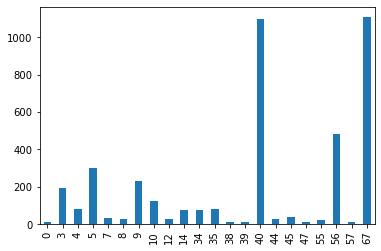

In [12]:
df[df['words Anth']>10]['words Anth'].plot(kind='bar')

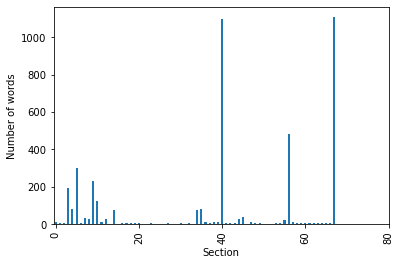

In [158]:
ax = df[df['words Anth']>50]['words Anth'].plot(kind='bar',  xlabel = 'Section', ylabel = 'Number of words')
#xticks = [0,20,40,60,80]
#title = 'Number of words for each section',

In [159]:
fig = ax.get_figure()
fig
# fig.savefig('No title bar df2')

<AxesSubplot:>

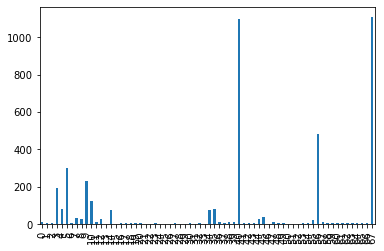

In [116]:
df[df['words Anth']>1]['words Anth'].plot(kind='bar')

<AxesSubplot:>

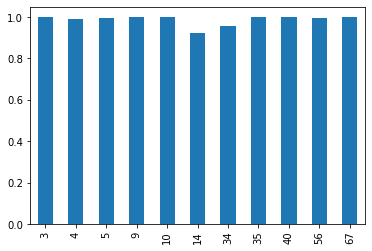

In [113]:
df[df['words Anth']>50]['cosine'].plot(kind='bar')

<AxesSubplot:ylabel='Density'>

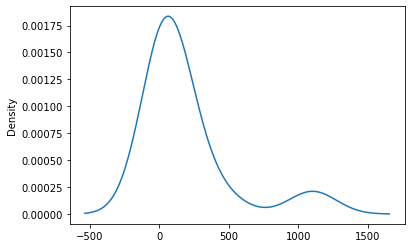

In [15]:
df[df['words Anth']>10]['words Anth'].plot(kind='density')

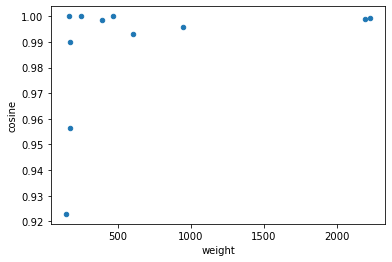

In [151]:
ax = df2.plot(kind = 'scatter', x='weight', y= 'cosine')#.save_fig('Scatterplot of cosine and weight')


In [104]:
df2.describe()

,words Anth,words Arxiv,weight,cosine
count,11.000000,11.000000,11.000000,11.000000
mean,349.818182,350.545455,700.363636,0.986807
std,392.556192,392.941055,785.448187,0.024704
min,75.000000,66.000000,141.000000,0.922924
25%,81.500000,89.000000,168.000000,0.991534
50%,193.000000,193.000000,386.000000,0.998476
75%,390.500000,385.000000,775.500000,0.999576
max,1108.000000,1121.000000,2229.000000,1.000000


In [109]:
print(df.describe().to_latex(float_format="%.2f", bold_rows=True))

\begin{tabular}{lrrrr}
\toprule
{} &  words Anth &  words Arxiv &  weight &  cosine \\
\midrule
\textbf{count} &       68.00 &        68.00 &   68.00 &   68.00 \\
\textbf{mean } &       62.78 &        62.59 &  125.37 &    0.99 \\
\textbf{std  } &      197.98 &       198.34 &  396.30 &    0.07 \\
\textbf{min  } &        2.00 &         2.00 &    4.00 &    0.46 \\
\textbf{25\%  } &        3.00 &         3.00 &    6.00 &    1.00 \\
\textbf{50\%  } &        5.50 &         5.50 &   11.00 &    1.00 \\
\textbf{75\%  } &       15.00 &        13.00 &   28.75 &    1.00 \\
\textbf{max  } &     1108.00 &      1121.00 & 2229.00 &    1.00 \\
\bottomrule
\end{tabular}



In [86]:
df.describe()

,words Anth,words Arxiv,weight,cosine
count,68.000000,68.000000,68.000000,68.000000
mean,62.779412,62.588235,125.367647,0.989947
std,197.981595,198.338564,396.297412,0.065914
min,2.000000,2.000000,4.000000,0.461530
25%,3.000000,3.000000,6.000000,1.000000
50%,5.500000,5.500000,11.000000,1.000000
75%,15.000000,13.000000,28.750000,1.000000
max,1108.000000,1121.000000,2229.000000,1.000000


In [87]:
df2.describe()

,words Anth,words Arxiv,weight,cosine
count,11.000000,11.000000,11.000000,11.000000
mean,349.818182,350.545455,700.363636,0.986807
std,392.556192,392.941055,785.448187,0.024704
min,75.000000,66.000000,141.000000,0.922924
25%,81.500000,89.000000,168.000000,0.991534
50%,193.000000,193.000000,386.000000,0.998476
75%,390.500000,385.000000,775.500000,0.999576
max,1108.000000,1121.000000,2229.000000,1.000000


In [175]:
df['Anth'][4]

'1 Introduction  Ontologies are rich sources of information that provide deep information about the underlying concepts and entities. This information is described for a speciﬁc domain, contains the clearly deﬁned relationship, and organizes in a deﬁned structure mostly as a hierarchy. These properties make ontologies a great source for getting a deeper understanding of the relationship and properties of resources from the domain in consideration. Public knowledge graphs and ontologies like DBpedia and Yago have been shown to work on various applications like '